# Lead Scoring Case Study


### Step 1: importing the packages and dataset

In [17]:
# importing the packages
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# importing the dataset
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()   #viewing the 5 top rows of the dataframe

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Some insights of the data

In [19]:
Lead_data.shape
# so there are total of 9740 rows and 37 ccolumns which we have to work on

(9240, 37)

In [20]:
# statistic insight of the data
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [21]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Cleaning the data (data preparation)

In [22]:
# converting the binary variables(yes/no) to 0/1

var_list= ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]

def binary_map(i):
    return i.map({ 'Yes': 1, 'No': 0 })

Lead_data[var_list]= Lead_data[var_list].apply(binary_map)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [23]:
Lead_data['Asymmetrique Profile Score'].astype('category').value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [24]:
# creating dummy variables

dummy1= pd.get_dummies(Lead_data[['What is your current occupation']], drop_first=True)
Lead_data= pd.concat([Lead_data, dummy1], axis=1)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,15.0,15.0,0,0,Modified,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,15.0,15.0,0,0,Email Opened,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,14.0,20.0,0,1,Email Opened,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,13.0,17.0,0,0,Modified,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,15.0,18.0,0,0,Modified,0,0,0,1,0


In [25]:
Lead_data = Lead_data.drop('What is your current occupation', axis=1)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,15.0,15.0,0,0,Modified,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,15.0,15.0,0,0,Email Opened,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,14.0,20.0,0,1,Email Opened,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,13.0,17.0,0,0,Modified,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,15.0,18.0,0,0,Modified,0,0,0,1,0


In [26]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Lead Origin                                           9240 non-null   object 
 3   Lead Source                                           9204 non-null   object 
 4   Do Not Email                                          9240 non-null   int64  
 5   Do Not Call                                           9240 non-null   int64  
 6   Converted                                             9240 non-null   int64  
 7   TotalVisits                                           9103 non-null   float64
 8   Total Time Spent on Website                           9240

In [27]:
# handling the "select" in many categorical variables
# from the data dictionary, we can see that 'select' is when a customer didn't choose anything from the list, so it is as good as null.
# So, we need to convert them to null values.

Lead_data = Lead_data.replace('Select', np.nan)


In [28]:
# now we need to check for all missing values/percentages in the dataframe

round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
How did you hear about X Education                      78.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                

In [29]:
# now theoretically, 25 to 30% missing values can be considered for imputation, but beyond 40, the column should be dropped
Lead_data= Lead_data.drop(columns=['How did you hear about X Education', 'Lead Profile','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [30]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


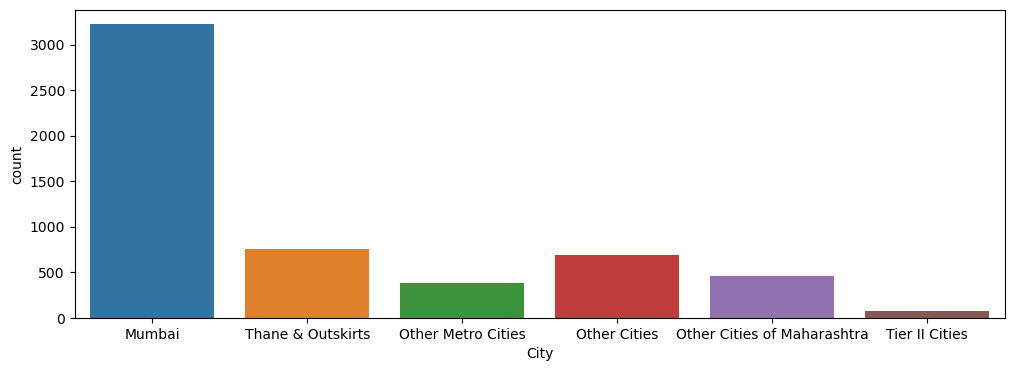

In [37]:
# now analysing the remaining columns individually

# 1- City with 40% missing values
plt.figure(figsize=(12,4))
sns.countplot(Lead_data['City'])
plt.show()

In [38]:
# since Mumbai as the most values, we can impute the missing values with this
Lead_data["City"]= Lead_data['City'].replace(np.nan, 'Mumbai')

In [39]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


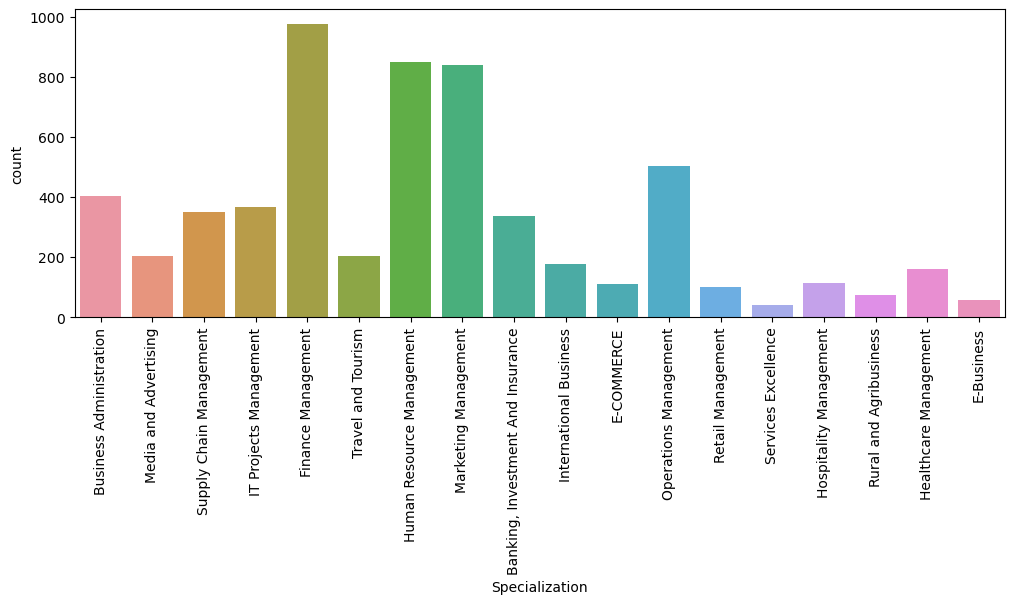

In [43]:
# 2- Specialization with 37% missing values

plt.figure(figsize=(12,4))
sns.countplot(Lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [44]:
# from the graph we can infer that the missing 37% values may have come from when the customer has different specialization than mentioned in the already list,
# to fix this we can create another category "others" for the missing values

Lead_data['Specialization']= Lead_data['Specialization'].replace(np.nan, 'Others')

In [45]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


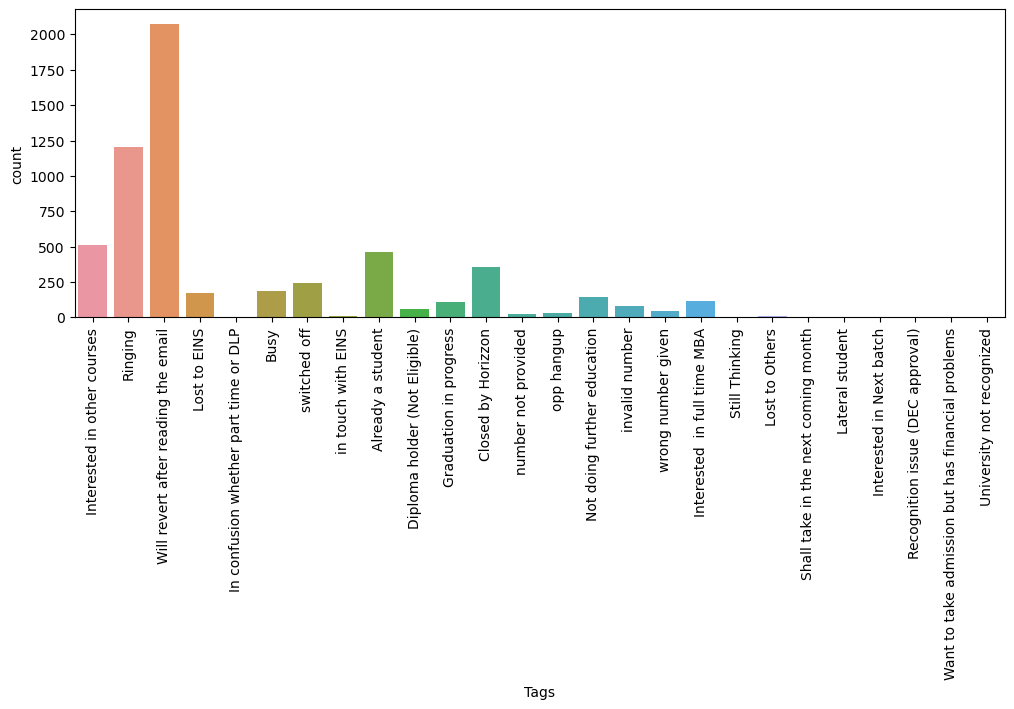

In [46]:
# next up we have 
# 3- Tags with 36% missing values

plt.figure(figsize=(12,4))
sns.countplot(Lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [47]:
# from the graph we can see one category has the most values, we can use this to replace missing values

Lead_data['Tags']= Lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [48]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


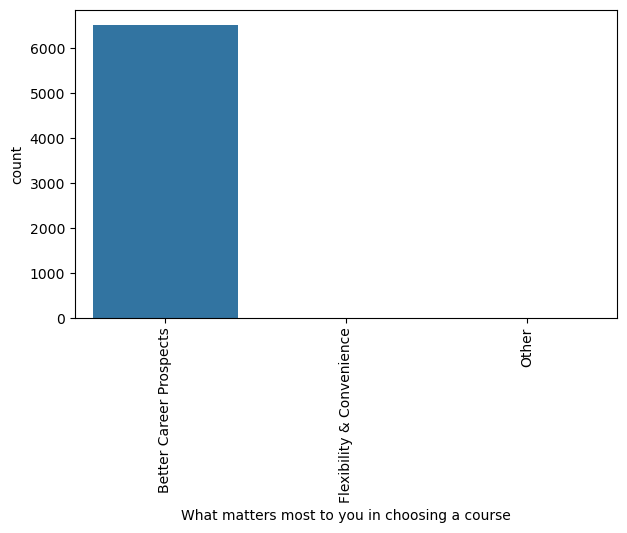

In [51]:
# now, we are left with only two columns
# 4- "What matters most to you in choosing a course" with 29% missing values

plt.figure(figsize=(7,4))
sns.countplot(Lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [52]:
# the graph is not clear about the other category values that is how much is the value,
# for that we need to see it in percentage view

round(Lead_data['What matters most to you in choosing a course'].value_counts(normalize=True), 2) * 100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [53]:
# we can see that other 2 categories have no value, so this is a highly skewed column
# we need to drop this column because this will not infer any good statistical insights

Lead_data= Lead_data.drop('What matters most to you in choosing a course', axis=1)

In [54]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article                                        0.0
X Education Forums      

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


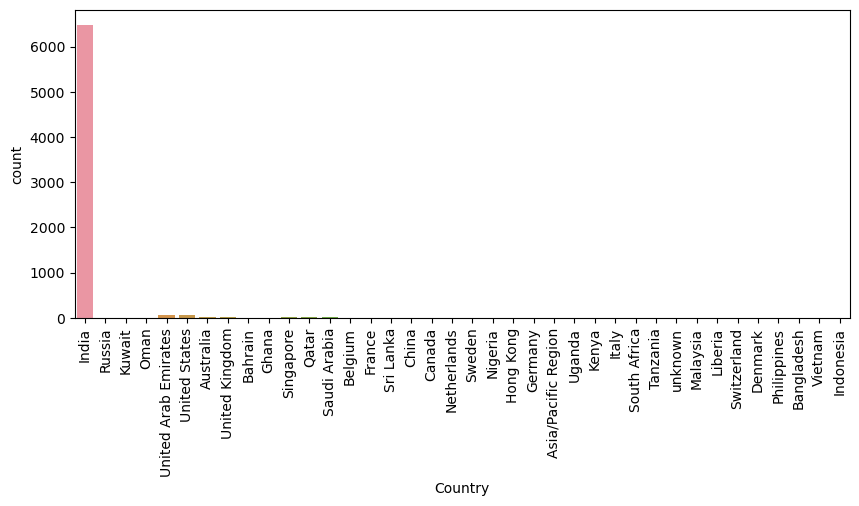

In [55]:
# we are left with one column now
# 5- Country with 27% missing values

plt.figure(figsize=(10,4))
sns.countplot(Lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

In [56]:
# since most values are India, we can impute missin values with this

Lead_data['Country']=Lead_data['Country'].replace(np.nan, 'India')

In [57]:
# Rest missing values are 1%, so we can drop the rows

Lead_data.dropna(inplace=True)

In [58]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                             0.0
Lead Number                                             0.0
Lead Origin                                             0.0
Lead Source                                             0.0
Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Last Activity                                           0.0
Country                                                 0.0
Specialization                                          0.0
Search                                                  0.0
Magazine                                                0.0
Newspaper Article                                       0.0
X Education Forums                      

In [59]:
# now , we are clear with the missing values
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Number                                           9074 non-null   int64  
 2   Lead Origin                                           9074 non-null   object 
 3   Lead Source                                           9074 non-null   object 
 4   Do Not Email                                          9074 non-null   int64  
 5   Do Not Call                                           9074 non-null   int64  
 6   Converted                                             9074 non-null   int64  
 7   TotalVisits                                           9074 non-null   float64
 8   Total Time Spent on Website                           9074